# Pymaceuticals Inc.
---

### Analysis
- The bar graph that plots the "# of Observed Mouse Timepoints" vs "Drug Regimen" clearly shows that the mice treated with Capomulin have the highest survival rates relative to mice treated with the other drug regimens.
- The pie charts show essentially equivalent gender distribution with essentially equal numbers of male and female mice.
- An analysis of the top four most promising drug treatment candidates was performed based on tumor volume. From the resulting box plot, it can be concluded that both Capomulin and Ramicane outperformed Infubinol and Ceftamin based on this metric (Tumor Volume (mm3)).
- A regression analysis was also performed which showed a positve correlation (correlation of 0.84) between mouse weight and tumor volume. As mouse weight increases, so does tumor volume.

In [1]:
# Import Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Map Paths to Data Files
mouse_metadata_path = "../Resources/Mouse_metadata.csv"
study_results_path = "../Resources/Study_results.csv"

# Read the Data Files
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the two data files into a single DataFrame
mouse_study_combined_df = pd.DataFrame(pd.merge(study_results, mouse_metadata, how="left",
                                         on=["Mouse ID", "Mouse ID"]))

# Display the data table for preview
mouse_study_combined_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of (unique) mice
unique_mice_count = mouse_study_combined_df["Mouse ID"].unique().size
unique_mice_count

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
# credit (https://github.com/redeat17/Matplotlib-Challenge/blob/master/pymaceuticals_starter.ipynb) 
duplicate_mice = mouse_study_combined_df.loc[mouse_study_combined_df.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicate_mice

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID.
# credit (https://github.com/redeat17/Matplotlib-Challenge/blob/master/pymaceuticals_starter.ipynb) 
duplicated_mice_data = mouse_study_combined_df.loc[mouse_study_combined_df["Mouse ID"] == "g989", :]
duplicated_mice_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

mouse_study_combined_cleaned_df = mouse_study_combined_df[mouse_study_combined_df['Mouse ID'].isin(duplicate_mice) ==False]
mouse_study_combined_cleaned_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_df_mice_count = mouse_study_combined_cleaned_df["Mouse ID"].unique().size
clean_df_mice_count

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mean = mouse_study_combined_cleaned_df["Tumor Volume (mm3)"].groupby(mouse_study_combined_cleaned_df["Drug Regimen"]).mean()
median = mouse_study_combined_cleaned_df["Tumor Volume (mm3)"].groupby(mouse_study_combined_cleaned_df["Drug Regimen"]).median()
var = mouse_study_combined_cleaned_df["Tumor Volume (mm3)"].groupby(mouse_study_combined_cleaned_df["Drug Regimen"]).var()
std = mouse_study_combined_cleaned_df["Tumor Volume (mm3)"].groupby(mouse_study_combined_cleaned_df["Drug Regimen"]).std()
sem = mouse_study_combined_cleaned_df["Tumor Volume (mm3)"].groupby(mouse_study_combined_cleaned_df["Drug Regimen"]).sem()

pymaceuticals_summary_stats_df = pd.DataFrame({"Mean Tumor Volum" : mean,
                                               "Median Tumor Volume" : median,
                                               "Tumor Volume Variance" : var,
                                               "Tumor Volume Std. Dev." : std,
                                               "Tumor Volume Std. Err." : sem})

pymaceuticals_summary_stats_df

,Mean Tumor Volum,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

pymaceuticals_summary_stats_aggmethod_df = mouse_study_combined_cleaned_df.groupby(
    ["Drug Regimen"])[["Tumor Volume (mm3)"]].agg(["mean", "median", "var", "std", "sem"])
pymaceuticals_summary_stats_aggmethod_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0, 0.5, '# of observed Mouse Timepoints')

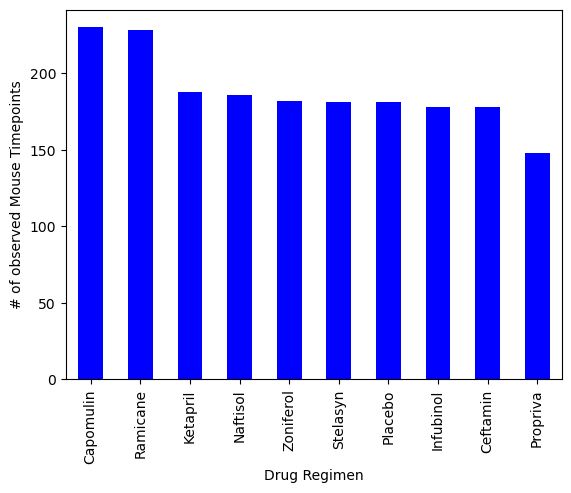

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

# First, count the total number of rows (Mouse ID/Timepoints) for each drug regimen:
mouse_timepoint_counts = mouse_study_combined_cleaned_df["Drug Regimen"].value_counts()

# Create the Pandas plot from the "mouse_counts" values:
plot_pandas = mouse_timepoint_counts.plot.bar(color="b")
plt.xlabel("Drug Regimen")
plt.ylabel("# of observed Mouse Timepoints")


<function matplotlib.pyplot.show(close=None, block=None)>

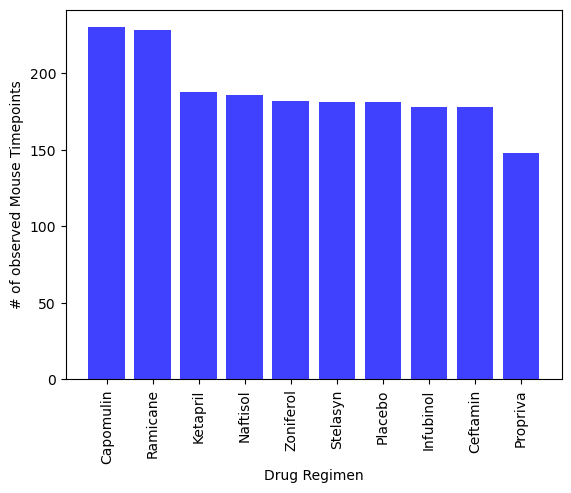

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = mouse_timepoint_counts.index.values
y_axis = mouse_timepoint_counts.values

#Create bar graph using the same "mouse_timepoint_counts" values from above
plt.bar(x_axis, y_axis, color="b", alpha=0.75, align="center")
plt.xlabel("Drug Regimen")
plt.ylabel("# of observed Mouse Timepoints")
plt.xticks(rotation="vertical")
plt.show

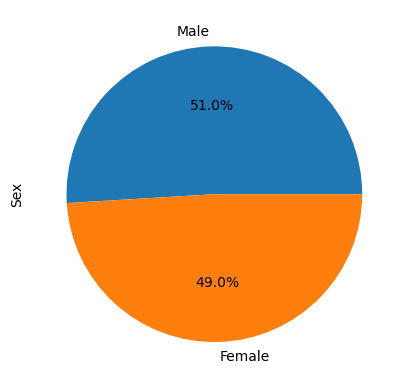

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
male_female_data = mouse_study_combined_cleaned_df["Sex"].value_counts()
male_female_data.plot.pie(autopct= "%1.1f%%")
plt.show()

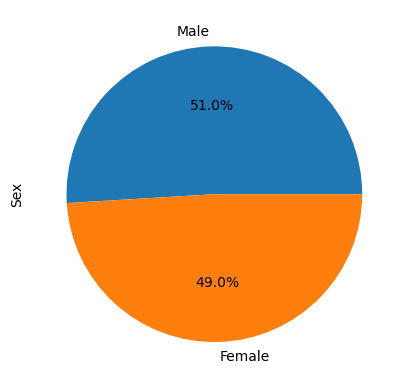

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Female", "Male"]
plot = male_female_data.plot.pie(y="Total Count", autopct="%1.1f%%")
plt.ylabel("Sex")
plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Credit: (https://github.com/cmartell5/pharma-analysis/blob/main/Pymaceuticals/pymaceuticals_final.ipynb)

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = mouse_study_combined_cleaned_df.groupby("Mouse ID")
last_timepoint = last_timepoint["Timepoint"].max()
last_timepoint_df = pd.DataFrame(last_timepoint)
last_timepoint_df.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume_df = pd.merge(last_timepoint_df, mouse_study_combined_cleaned_df, on = ["Mouse ID", "Timepoint"])


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_capomulin = []
tumor_vol_ramicane = []
tumor_vol_infubinol = []
tumor_vol_ceftamin = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.

# Locate the rows which contain mice on each drug and get the tumor volumes
for x in range(len(final_tumor_volume_df)-1):
    if final_tumor_volume_df.loc[x, "Drug Regimen"] == "Capomulin":
        tumor_vol_capomulin.append(final_tumor_volume_df.loc[x, "Tumor Volume (mm3)"])
    if final_tumor_volume_df.loc[x, "Drug Regimen"] == "Ramicane":
        tumor_vol_ramicane.append(final_tumor_volume_df.loc[x, "Tumor Volume (mm3)"])
    if final_tumor_volume_df.loc[x, "Drug Regimen"] == "Infubinol":
        tumor_vol_infubinol.append(final_tumor_volume_df.loc[x, "Tumor Volume (mm3)"])
    if final_tumor_volume_df.loc[x, "Drug Regimen"] == "Ceftamin":
        tumor_vol_ceftamin.append(final_tumor_volume_df.loc[x, "Tumor Volume (mm3)"])

# add subset
tumor_vol = [tumor_vol_capomulin, tumor_vol_ramicane, tumor_vol_infubinol, tumor_vol_ceftamin]

# Determine outliers using upper and lower bounds
outlier = []
for x in range(len(tumor_vol)):
    quartiles = pd.Series(tumor_vol[x]).quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f"\n{treatments[x]}:")

    print(f"The lower quartile of tumor volume is: {lowerq}")
    print(f"The upper quartile of tumor volume is: {upperq}")
    print(f"The interquartile range of tumor volume is: {iqr}")
    print(f"The the median of tumor volume is: {quartiles[0.5]}")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
      
for y in range(len(tumor_vol[x])):
    if (tumor_vol[x][y] < lower_bound) or (tumor_vol[x][y] > upper_bound):
        the_outlier = tumor_vol[x][y]
        outlier.append(the_outlier)
        print(f"The outliers are {outlier}.")


Capomulin:
The lower quartile of tumor volume is: 32.37735684
The upper quartile of tumor volume is: 40.1592203
The interquartile range of tumor volume is: 7.781863460000004
The the median of tumor volume is: 38.1251644
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.

Ramicane:
The lower quartile of tumor volume is: 31.56046955
The upper quartile of tumor volume is: 40.65900627
The interquartile range of tumor volume is: 9.098536719999998
The the median of tumor volume is: 36.56165229
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.

Infubinol:
The lower quartile of tumor volume is: 54.04860769
The upper quartile of tumor volume is: 65.52574285
The interquartile range of tumor volume is: 11.477135160000003
The the median of tumor volume is: 60.16518046
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.

Ceftamin:
The lower quartile of tumor volum

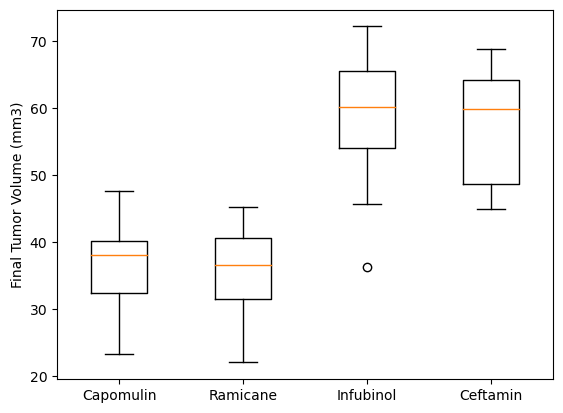

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, axs = plt.subplots()
axs.set_ylabel("Final Tumor Volume (mm3)")
axs.boxplot(tumor_vol)
axs.set_xticklabels(treatments)
plt.show()

## Line and Scatter Plots

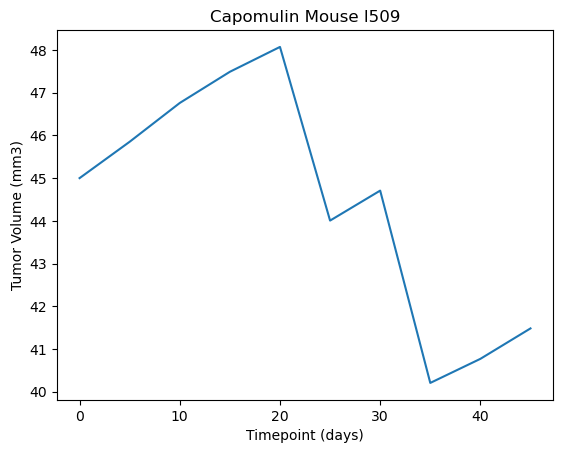

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
def line_plot(regimen, mouse_id):
    capomulin_mousel509_plot = mouse_study_combined_cleaned_df.loc[mouse_study_combined_cleaned_df["Drug Regimen"] == regimen]
    id_data = capomulin_mousel509_plot.loc[capomulin_mousel509_plot["Mouse ID"] == mouse_id]
    plt.plot(id_data["Timepoint"], id_data["Tumor Volume (mm3)"])
    plt.xlabel("Timepoint (days)")
    plt.ylabel("Tumor Volume (mm3)")
    plt.title(regimen + " Mouse " + mouse_id)
    plt.show()
line_plot("Capomulin", "l509")

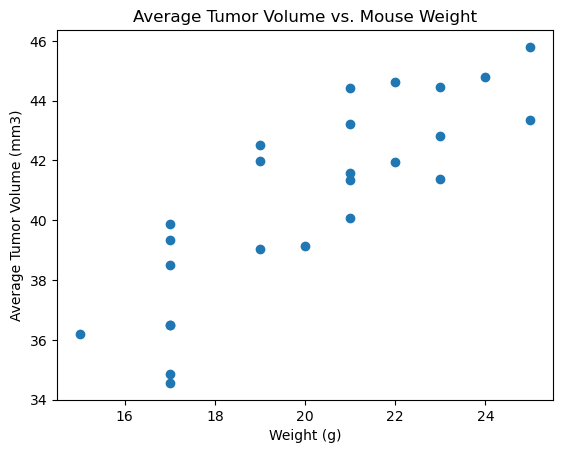

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_plot_df = mouse_study_combined_cleaned_df.loc[mouse_study_combined_cleaned_df["Drug Regimen"] == "Capomulin"]
grouped_capomulin_df = capomulin_plot_df.groupby("Mouse ID")

capomulin_avg_tumor = grouped_capomulin_df["Tumor Volume (mm3)"].mean()
mouse_weight = grouped_capomulin_df["Weight (g)"].mean()
avg_capomulin_df = pd.DataFrame({"Weight (g)" : mouse_weight,
                                 "Tumor Volume (mm3)" : capomulin_avg_tumor})

plt.scatter(mouse_weight, capomulin_avg_tumor)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Tumor Volume vs. Mouse Weight")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


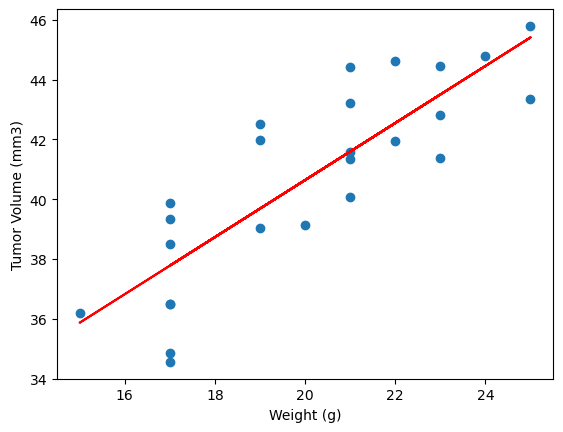

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
# credit: https://github.com/elsafig/Matplotlib-Challenge-Repo/blob/main/pymaceuticals.ipynb

correlation = st.pearsonr(mouse_weight, capomulin_avg_tumor)

print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

x_values = avg_capomulin_df["Weight (g)"]
y_values = avg_capomulin_df["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(mouse_weight, capomulin_avg_tumor)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()